In [76]:
import kan
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
import numpy.random as npr

In [6]:
N = 5

In [7]:
input = utils.generate_input_torch(N)
input

tensor([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [1., 1., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [1., 0., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1.],
        [0., 1., 0., 0., 1.],
        [1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1.],
        [0., 1., 1., 0., 1.],
        [1., 1., 1., 0., 1.],
        [0., 0., 0., 1., 1.],
        [1., 0., 0., 1., 1.],
        [0., 1., 0., 1., 1.],
        [1., 1., 0., 1., 1.],
        [0., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [13]:
labels = torch.tensor([1 - 2 * (magnetization.count_magnetization(i) % 2) for i in range(2 ** N)]).reshape((-1, 1))
labels

tensor([[ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [-1]])

In [20]:
dataset = {'train_input': input, 'train_label': labels, 'test_input': input, 'test_label': labels}

checkpoint directory created: ./model
saving model version 0.0


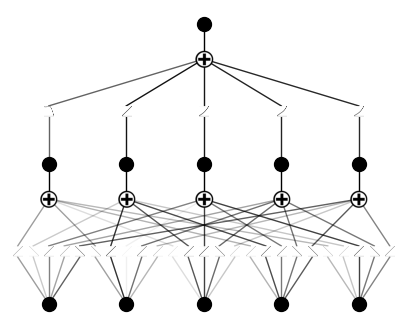

In [23]:
kan_model = kan.KAN(width = [N, N, 1])
kan_model(dataset['train_input']);
kan_model.plot()

In [24]:
# train the model
kan_model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 8.88e-03 | test_loss: 8.88e-03 | reg: 1.14e+01 | : 100%|█| 50/50 [00:03<00:00, 16.39it

saving model version 0.1


description:   0%|                                                           | 0/50 [01:24<?, ?it/s]


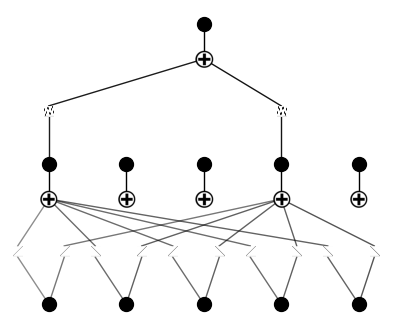

In [26]:
kan_model.plot()

(array([-0.97408223, -0.6490557 , -0.5301678 , -0.5300149 , -0.52974087,
        -0.49082482, -0.20514125, -0.20498832, -0.20471434, -0.1657983 ,
        -0.08610037, -0.08582637, -0.08567348, -0.04691036, -0.04675743,
        -0.04648344,  0.2389262 ,  0.23920015,  0.23935309,  0.2781162 ,
         0.2782691 ,  0.27854308,  0.358241  ,  0.39715707,  0.39743108,
         0.39758396,  0.6832676 ,  0.72218364,  0.7224576 ,  0.72261053,
         0.84149843,  1.166525  ], dtype=float32),
 array([ 0.31827646, -0.75345373, -0.5101955 , -0.5097722 , -0.5090131 ,
        -0.39517808,  0.4010783 ,  0.40129527,  0.4016829 ,  0.44277477,
         0.42523292,  0.42490232,  0.42471704,  0.3594996 ,  0.3591759 ,
         0.3585949 , -0.52445406, -0.52503484, -0.5253586 , -0.5905731 ,
        -0.5907583 , -0.5910889 , -0.6086255 , -0.56753355, -0.56714576,
        -0.5669289 ,  0.22914074,  0.3429062 ,  0.34366456,  0.34408793,
         0.5870331 , -0.48664021], dtype=float32))

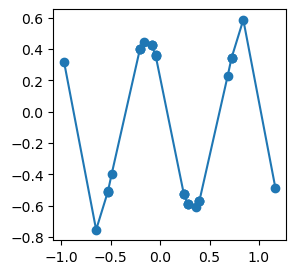

In [27]:
kan_model.get_fun(1, 0, 0)

(array([-1.3362801 , -0.94076395, -0.8559994 , -0.85562664, -0.8551108 ,
        -0.80222654, -0.46048334, -0.46011057, -0.45959473, -0.40671048,
        -0.37534603, -0.37483022, -0.37445742, -0.32194594, -0.32157317,
        -0.32105735,  0.02017003,  0.02068588,  0.02105868,  0.07357013,
         0.0739429 ,  0.07445875,  0.10582316,  0.15870744,  0.15922326,
         0.15959606,  0.50133926,  0.55422354,  0.55473936,  0.5551121 ,
         0.6398766 ,  1.0353928 ], dtype=float32),
 array([-0.44092077,  0.7168371 ,  0.5266316 ,  0.5256251 ,  0.52422994,
         0.370456  , -0.5371984 , -0.53754145, -0.53801167, -0.5593265 ,
        -0.54427856, -0.54384375, -0.5435255 , -0.4694041 , -0.46868777,
        -0.4676925 ,  0.53073967,  0.5317357 ,  0.5324526 ,  0.6066535 ,
         0.6069723 ,  0.60740805,  0.62251   ,  0.60129625,  0.6008268 ,
         0.6004846 , -0.306202  , -0.45980373, -0.4611972 , -0.46220285,
        -0.6521516 ,  0.5056504 ], dtype=float32))

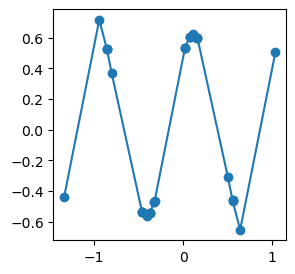

In [28]:
kan_model.get_fun(1, 3, 0)

In [31]:
kan_model = kan_model.prune()

saving model version 0.2


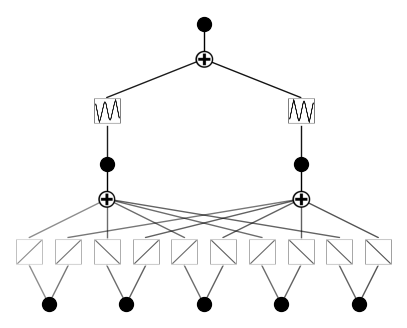

In [32]:
kan_model.plot()

In [33]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
kan_model.auto_symbolic(lib = lib)

fixing (0,0,0) with x, r2=1.0000005960464478, c=1
fixing (0,0,1) with x, r2=1.0000004768371582, c=1
fixing (0,1,0) with x, r2=1.0000004768371582, c=1
fixing (0,1,1) with x, r2=1.0000005960464478, c=1
fixing (0,2,0) with x, r2=1.0000005960464478, c=1
fixing (0,2,1) with x, r2=1.0000004768371582, c=1
fixing (0,3,0) with x, r2=1.0000005960464478, c=1
fixing (0,3,1) with x, r2=1.0000004768371582, c=1
fixing (0,4,0) with x, r2=1.0000003576278687, c=1
fixing (0,4,1) with x, r2=1.0000005960464478, c=1
fixing (1,0,0) with sin, r2=0.9936583042144775, c=2
fixing (1,1,0) with sin, r2=0.9962949752807617, c=2
saving model version 0.3


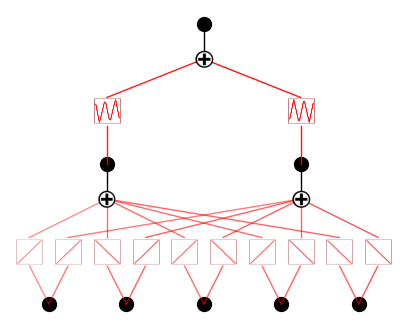

In [34]:
kan_model.plot()

In [35]:
kan_model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 4.68e-07 | test_loss: 4.68e-07 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 28.81it

saving model version 0.4


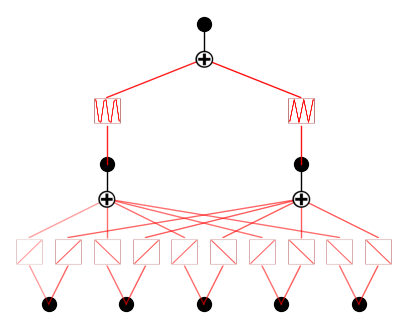

In [36]:
kan_model.plot()

In [38]:
from kan.utils import ex_round

ex_round(kan_model.symbolic_formula()[0][0],4)

0.5477*sin(1.9366*x_1 - 3.1416*x_2 + 3.1416*x_3 + 3.1416*x_4 - 3.1416*x_5 + 8.3761) + 0.5916*sin(2.8999*x_1 + 3.1416*x_2 - 3.1416*x_3 - 3.1416*x_4 - 3.1416*x_5 + 8.332)

In [40]:
kan_model(torch.tensor([[0., 0., 0., 0., 0.]]))

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\kan\MultKAN.py:813: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1808.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\kan\MultKAN.py:823: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1808.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\kan\MultKAN.py:824: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

tensor([[1.0000]], grad_fn=<AddBackward0>)

checkpoint directory created: ./model
saving model version 0.0


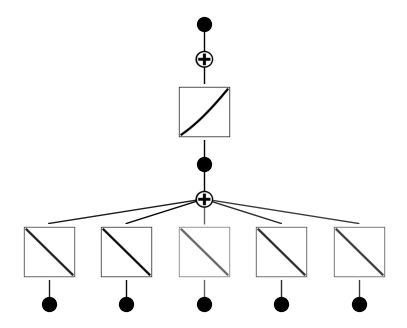

In [ ]:
torch.manual_seed(5)
smaller_kan = kan.KAN(width=[N, 1, 1]) # most of the time this fails but seems this manual seed works?
smaller_kan(dataset['train_input'])
smaller_kan.plot()

In [66]:
smaller_kan.fit(dataset, opt = 'LBFGS', steps = 50);

| train_loss: 5.06e-07 | test_loss: 5.06e-07 | reg: 1.25e+01 | : 100%|█| 50/50 [00:02<00:00, 18.30it

saving model version 0.1


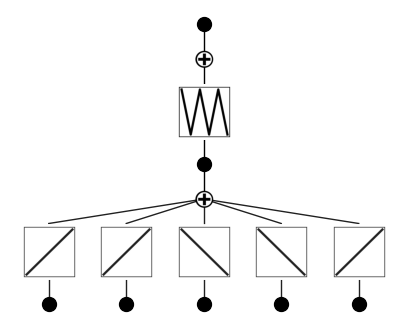

In [67]:
smaller_kan.plot()

In [68]:
for i in range(N):
    smaller_kan.fix_symbolic(0, i, 0, 'x')

r2 is 1.0000005960464478
saving model version 0.2
r2 is 1.0000005960464478
saving model version 0.3
r2 is 1.0000007152557373
saving model version 0.4
r2 is 1.0000005960464478
saving model version 0.5
r2 is 1.0000007152557373
saving model version 0.6


In [69]:
smaller_kan.fix_symbolic(1, 0, 0, 'sin')

r2 is 1.0000003576278687
saving model version 0.7


tensor(1.0000)

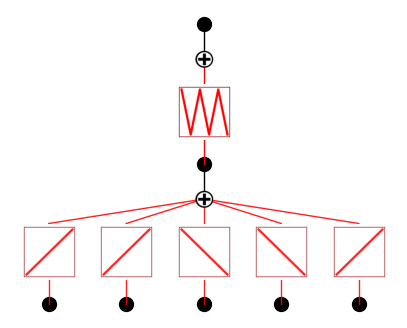

In [70]:
smaller_kan.plot()

In [ ]:
smaller_kan.fit(dataset, opt = 'LBFGS', steps = 50);

| train_loss: 1.25e-06 | test_loss: 1.25e-06 | reg: 0.00e+00 | : 100%|█| 50/50 [00:01<00:00, 41.40it

saving model version 0.8


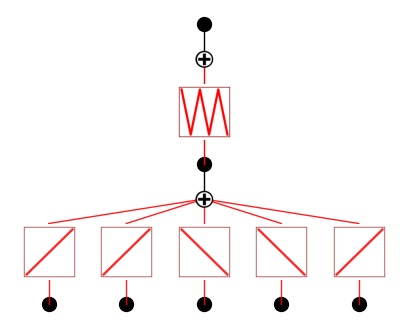

In [72]:
smaller_kan.plot()

In [73]:
ex_round(smaller_kan.symbolic_formula()[0][0],4)

-1.0*sin(3.1399*x_1 + 3.1415*x_2 - 3.1428*x_3 - 3.1433*x_4 + 3.1405*x_5 - 1.5677)

In [74]:
# now test larger size simulating sampling from a network.

In [75]:
N = 20

In [77]:
import random

In [92]:
random.getrandbits(20)

827036

In [94]:
num_samples = 500
samples = [random.getrandbits(N) for _ in range(num_samples)]

In [95]:
sampled_input = utils.generate_input_samples(N, samples)
print(samples[0])
print(sampled_input[0])

220153
tensor([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
        0., 0.])


In [96]:
sampled_labels = torch.tensor([1 - 2 * (magnetization.count_magnetization(i) % 2) for i in samples]).reshape((-1, 1))
sampled_labels

tensor([[-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [-1],
        [-1],
        [ 1],
        [-1],
        [ 1],
        [-1],
        [-1],
        [-1],
        [ 1],
      

In [97]:
sampled_dataset = {'train_input': sampled_input, 'train_label': sampled_labels, 'test_input': sampled_input, 'test_label': sampled_labels}

In [107]:
sampling_kan = kan.KAN(width = [N, N, 1])
sampling_kan(sampled_dataset['train_input'])
# sampling_kan.plot()

checkpoint directory created: ./model
saving model version 0.0


tensor([[ 1.5815e-01],
        [ 6.4348e-02],
        [ 6.9712e-02],
        [ 1.0527e-01],
        [ 7.3460e-02],
        [ 2.8843e-02],
        [ 1.5227e-01],
        [ 1.9819e-01],
        [ 6.9292e-02],
        [ 4.2162e-02],
        [-3.4983e-02],
        [ 5.7199e-02],
        [ 7.9704e-02],
        [ 1.6360e-01],
        [ 2.4892e-02],
        [ 7.2513e-02],
        [-7.6167e-02],
        [ 1.0430e-01],
        [ 6.0917e-02],
        [ 3.7643e-02],
        [ 1.1182e-01],
        [ 2.1177e-01],
        [ 6.2593e-02],
        [ 5.8848e-02],
        [ 7.4857e-02],
        [ 1.9176e-01],
        [ 6.6825e-02],
        [ 2.9594e-02],
        [ 4.8710e-02],
        [-9.9670e-03],
        [ 4.5880e-02],
        [ 1.1327e-01],
        [ 7.0937e-02],
        [ 7.9926e-02],
        [ 3.9360e-02],
        [ 1.3004e-01],
        [ 3.8540e-02],
        [ 4.8584e-02],
        [ 2.5975e-02],
        [ 9.0797e-02],
        [ 1.3692e-01],
        [ 8.2133e-02],
        [ 5.9155e-02],
        [ 1

In [108]:
sampling_kan.fit(sampled_dataset, opt = 'LBFGS', steps = 50, lamb=0.001);

| train_loss: 8.95e-02 | test_loss: 8.95e-02 | reg: 8.47e+01 | : 100%|█| 50/50 [00:36<00:00,  1.38it

saving model version 0.1


In [109]:
sampling_kan.fit(sampled_dataset, opt = 'LBFGS', steps = 50, lamb=0.001);

| train_loss: 7.56e-02 | test_loss: 7.56e-02 | reg: 8.19e+01 | : 100%|█| 50/50 [00:36<00:00,  1.36it

saving model version 0.2


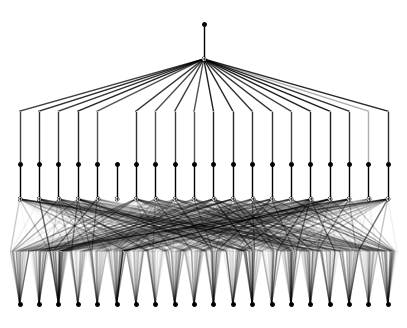

In [110]:
sampling_kan.plot()

In [111]:
sampling_kan = sampling_kan.prune()

saving model version 0.3


In [128]:
sampling_kan.width

[[20, 0], [19, 0], [1, 0]]

In [129]:
for i in range(20):
    for j in range(19):
        sampling_kan.fix_symbolic(0, i, j, 'x')
for j in range(19):
    sampling_kan.fix_symbolic(1, j, 0, 'sin')

r2 is 1.0000008344650269
saving model version 0.4
Best value at boundary.
r2 is 1.0000007152557373
saving model version 0.5
r2 is 1.0000007152557373
saving model version 0.6
r2 is 1.0000004768371582
saving model version 0.7
r2 is 0.999999463558197
saving model version 0.8
r2 is 1.0000008344650269
saving model version 0.9
Best value at boundary.
r2 is 1.0000005960464478
saving model version 0.10
r2 is 1.0000007152557373
saving model version 0.11
r2 is 1.0000008344650269
saving model version 0.12
r2 is 1.0000007152557373
saving model version 0.13
r2 is 1.0000007152557373
saving model version 0.14
Best value at boundary.
r2 is 1.0000005960464478
saving model version 0.15
r2 is 1.0000005960464478
saving model version 0.16
r2 is 1.0000008344650269
saving model version 0.17
r2 is 1.0000007152557373
saving model version 0.18
r2 is 1.0000007152557373
saving model version 0.19
r2 is 1.000000238418579
saving model version 0.20
r2 is 1.0000004768371582
saving model version 0.21
r2 is 1.0000008344

In [130]:
sampling_kan.fit(sampled_dataset, opt = 'LBFGS', steps = 50);

| train_loss: 1.57e-01 | test_loss: 1.57e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [01:49<00:00,  2.20s/

saving model version 0.403


In [131]:
sampling_kan.fit(sampled_dataset, opt = 'LBFGS', steps = 50);

| train_loss: 1.25e-01 | test_loss: 1.25e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [01:52<00:00,  2.25s/

saving model version 0.404


In [ ]:
ex_round(sampling_kan.symbolic_formula()[0][0],4)

-0.5654*sin(-1.5725*x_1 - 0.1314*x_10 - 0.0518*x_11 + 0.412*x_12 - 2.0193*x_13 - 0.8719*x_14 + 2.2267*x_15 + 0.4617*x_16 + 1.5048*x_17 + 0.7856*x_18 + 1.083*x_19 + 1.2215*x_2 + 0.1966*x_20 + 1.265*x_3 + 0.391*x_4 + 0.3865*x_5 - 1.3569*x_6 + 0.3833*x_7 + 0.158*x_8 + 0.1164*x_9 + 3.4301) - 0.4963*sin(-1.3965*x_1 - 0.8226*x_10 - 0.7073*x_11 + 0.2056*x_12 + 1.3993*x_13 - 0.4964*x_14 + 1.3764*x_15 + 0.7086*x_16 + 0.8429*x_17 - 0.8582*x_18 + 0.5073*x_19 - 1.3195*x_2 - 0.2684*x_20 + 1.5212*x_3 + 0.8367*x_4 + 0.6909*x_5 - 0.3997*x_6 + 0.1706*x_7 - 1.2772*x_8 + 1.2602*x_9 - 2.6786) + 0.5102*sin(-0.8463*x_1 - 0.1134*x_10 + 2.861*x_11 + 0.3388*x_12 - 1.0116*x_13 + 0.7785*x_14 - 0.2327*x_15 - 2.231*x_16 - 0.4018*x_17 + 0.6997*x_18 + 0.7118*x_19 + 0.2943*x_2 + 2.0877*x_20 + 0.1061*x_3 + 0.8019*x_4 + 0.8257*x_5 + 1.4408*x_6 - 1.2573*x_7 + 0.8052*x_8 - 1.2664*x_9 + 0.8406) + 0.3745*sin(-0.7609*x_1 + 0.5046*x_10 + 1.1808*x_11 - 0.2399*x_12 + 0.3478*x_13 + 1.3831*x_14 - 1.6223*x_15 - 1.4638*x_16 - 0.57

: 